<a href="https://colab.research.google.com/github/GaneshiUmayangana/BreastCancer-Prediction/blob/main/WithClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as pl
import random
import seaborn as sns
import math
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cross_decomposition import PLSRegression
from matplotlib.colors import ListedColormap
from sklearn.model_selection import RepeatedKFold, cross_val_score
from sklearn.preprocessing import scale
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from imblearn.combine import SMOTETomek
import statsmodels.api as sm
from itertools import combinations
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from pandas import DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from collections import Counter
from sklearn.metrics import silhouette_samples, silhouette_score
from yellowbrick.cluster import silhouette_visualizer
from sklearn.metrics import classification_report


from sklearn.tree import DecisionTreeClassifier



#Import dataset

In [ ]:
data_set = pd.read_csv("/content/data.csv")
data_set

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [ ]:
data_set.shape

NameError: name 'data_set' is not defined

In [ ]:
data_set.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
data_set.tail()

NameError: name 'data_set' is not defined

#Data Preprocessing

Checking the missing values

In [ ]:
data_set.isna().sum()

NameError: name 'data_set' is not defined

Checking the duplicates

In [ ]:
data_set.duplicated().sum()

0

Dropping Unnecessary columns

In [ ]:
data_set.drop(['id'],axis=1,inplace=True)
data_set.drop(['Unnamed: 32'],axis=1,inplace=True)

NameError: name 'data_set' is not defined

Data types of each variables

In [ ]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

Response variable

In [ ]:
data_set['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

Describe the dataset

In [ ]:
data_set.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Identify the y and x variables

In [ ]:
Y = data_set['diagnosis']


In [ ]:
X = data_set.drop('diagnosis',axis=1)
X

NameError: name 'data_set' is not defined

#Split the data

In [ ]:
random.seed(10)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=10)

train set

In [ ]:
train_set = pd.concat([X_train,Y_train],axis=1)
train_set

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.1650,0.8681,0.93870,0.26500,0.4087,0.12400,M
295,13.77,13.27,88.06,582.7,0.09198,0.06221,0.01063,0.01917,0.1592,0.05912,...,16.93,94.17,661.1,0.1170,0.1072,0.03732,0.05802,0.2823,0.06794,B
91,15.37,22.76,100.20,728.2,0.09200,0.10360,0.11220,0.07483,0.1717,0.06097,...,25.84,107.50,830.9,0.1257,0.1997,0.28460,0.14760,0.2556,0.06828,M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.24160,0.18600,0.2750,0.08902,M
94,15.06,19.83,100.30,705.6,0.10390,0.15530,0.17000,0.08815,0.1855,0.06284,...,24.23,123.50,1025.0,0.1551,0.4203,0.52030,0.21150,0.2834,0.08234,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,22.01,21.90,147.20,1482.0,0.10630,0.19540,0.24480,0.15010,0.1824,0.06140,...,25.80,195.00,2227.0,0.1294,0.3885,0.47560,0.24320,0.2741,0.08574,M
320,10.25,16.18,66.52,324.2,0.10610,0.11110,0.06726,0.03965,0.1743,0.07279,...,20.61,71.53,390.4,0.1402,0.2360,0.18980,0.09744,0.2608,0.09702,B
527,12.34,12.27,78.94,468.5,0.09003,0.06307,0.02958,0.02647,0.1689,0.05808,...,19.27,87.22,564.9,0.1292,0.2074,0.17910,0.10700,0.3110,0.07592,B
125,13.85,17.21,88.44,588.7,0.08785,0.06136,0.01420,0.01141,0.1614,0.05890,...,23.58,100.30,725.9,0.1157,0.1350,0.08115,0.05104,0.2364,0.07182,B


Test set

In [ ]:
test_set = pd.concat([X_test,Y_test],axis=1)
test_set

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
172,15.460,11.89,102.50,736.9,0.12570,0.15550,0.203200,0.10970,0.1966,0.07069,...,17.04,125.00,1102.0,0.1531,0.35830,0.58300,0.18270,0.3216,0.10100,M
553,9.333,21.94,59.01,264.0,0.09240,0.05605,0.039960,0.01282,0.1692,0.06576,...,25.05,62.86,295.8,0.1103,0.08298,0.07993,0.02564,0.2435,0.07393,B
374,13.690,16.07,87.84,579.1,0.08302,0.06374,0.025560,0.02031,0.1872,0.05669,...,20.21,99.16,670.6,0.1105,0.20960,0.13460,0.06987,0.3323,0.07701,B
370,16.350,23.29,109.00,840.4,0.09742,0.14970,0.181100,0.08773,0.2175,0.06218,...,31.03,129.30,1165.0,0.1415,0.46650,0.70870,0.22480,0.4824,0.09614,M
419,11.160,21.41,70.95,380.3,0.10180,0.05978,0.008955,0.01076,0.1615,0.06144,...,28.92,79.26,458.0,0.1282,0.11080,0.03582,0.04306,0.2976,0.07123,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,11.810,17.39,75.27,428.9,0.10070,0.05562,0.023530,0.01553,0.1718,0.05780,...,26.48,79.57,489.5,0.1356,0.10000,0.08803,0.04306,0.3200,0.06576,B
429,12.720,17.67,80.98,501.3,0.07896,0.04522,0.014020,0.01835,0.1459,0.05544,...,20.96,88.87,586.8,0.1068,0.09605,0.03469,0.03612,0.2165,0.06025,B
399,11.800,17.26,75.26,431.9,0.09087,0.06232,0.028530,0.01638,0.1847,0.06019,...,24.49,86.00,562.0,0.1244,0.17260,0.14490,0.05356,0.2779,0.08121,B
323,20.340,21.51,135.90,1264.0,0.11700,0.18750,0.256500,0.15040,0.2569,0.06670,...,31.86,171.10,1938.0,0.1592,0.44920,0.53440,0.26850,0.5558,0.10240,M


#Select Important variables with classification tree

In [ ]:
random.seed(10)
dt = DecisionTreeClassifier()

NameError: name 'random' is not defined

In [ ]:
dt.fit(X_train, Y_train)

DecisionTreeClassifier()

In [ ]:
feature_names = X_train.columns

NameError: name 'X_train' is not defined

In [ ]:
# prediction
dt.score(X_test, Y_test)


0.8947368421052632

get feature importance

In [ ]:
random.seed(10)
importances = dt.feature_importances_

NameError: name 'random' is not defined

 Create a DataFrame to display feature importances

In [ ]:
feature_importance_df = pd.DataFrame(importances,feature_names, columns=['Importance'])
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("Feature Importance:")
print(feature_importance_df)

NameError: name 'pd' is not defined

################

#Important variables Assing in xtrain

In [ ]:
select_imp = feature_names[importances>=0.006]
select_imp

Index(['texture_mean', 'area_mean', 'symmetry_mean', 'smoothness_se',
       'symmetry_se', 'texture_worst', 'perimeter_worst', 'area_worst',
       'concave points_worst'],
      dtype='object')

In [ ]:
not_select =feature_names[importances<0.006]
not_select

Index(['radius_mean', 'perimeter_mean', 'smoothness_mean', 'compactness_mean',
       'concavity_mean', 'concave points_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'compactness_se',
       'concavity_se', 'concave points_se', 'fractal_dimension_se',
       'radius_worst', 'smoothness_worst', 'compactness_worst',
       'concavity_worst', 'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [ ]:
X_train.drop(not_select,axis=1,inplace=True)

X_test.drop(['radius_mean', 'perimeter_mean', 'smoothness_mean', 'compactness_mean',
       'concave points_mean', 'radius_se', 'perimeter_se', 'area_se',
       'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se',
       'fractal_dimension_se', 'radius_worst', 'area_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'symmetry_worst', 'fractal_dimension_worst'],axis=1,inplace=True)

NameError: name 'X_train' is not defined

In [ ]:
Col =X_train.columns
Col

Index(['texture_mean', 'area_mean', 'symmetry_mean', 'smoothness_se',
       'symmetry_se', 'texture_worst', 'perimeter_worst', 'area_worst',
       'concave points_worst'],
      dtype='object')

In [ ]:
X_train.shape

NameError: name 'X_train' is not defined

#Correlation between each explanatory variables

In [ ]:
corr_matrix=X_train.corr()
corr_matrix

,texture_mean,area_mean,symmetry_mean,smoothness_se,symmetry_se,texture_worst,perimeter_worst,area_worst,concave points_worst
texture_mean,1.000000,0.334507,0.073354,-0.001682,-0.001248,0.909002,0.377564,0.365058,0.315571
area_mean,0.334507,1.000000,0.139669,-0.156241,-0.072359,0.287614,0.956812,0.959682,0.731099
symmetry_mean,0.073354,0.139669,1.000000,0.176917,0.413110,0.075621,0.209650,0.169420,0.391040
smoothness_se,-0.001682,-0.156241,0.176917,1.000000,0.437485,-0.093231,-0.217490,-0.180045,-0.120988
symmetry_se,-0.001248,-0.072359,0.413110,0.437485,1.000000,-0.112610,-0.111791,-0.112439,-0.072843
texture_worst,0.909002,0.287614,0.075621,-0.093231,-0.112610,1.000000,0.372419,0.355236,0.360596
perimeter_worst,0.377564,0.956812,0.209650,-0.217490,-0.111791,0.372419,1.000000,0.978251,0.826465
area_worst,0.365058,0.959682,0.169420,-0.180045,-0.112439,0.355236,0.978251,1.000000,0.757785
concave points_worst,0.315571,0.731099,0.391040,-0.120988,-0.072843,0.360596,0.826465,0.757785,1.000000


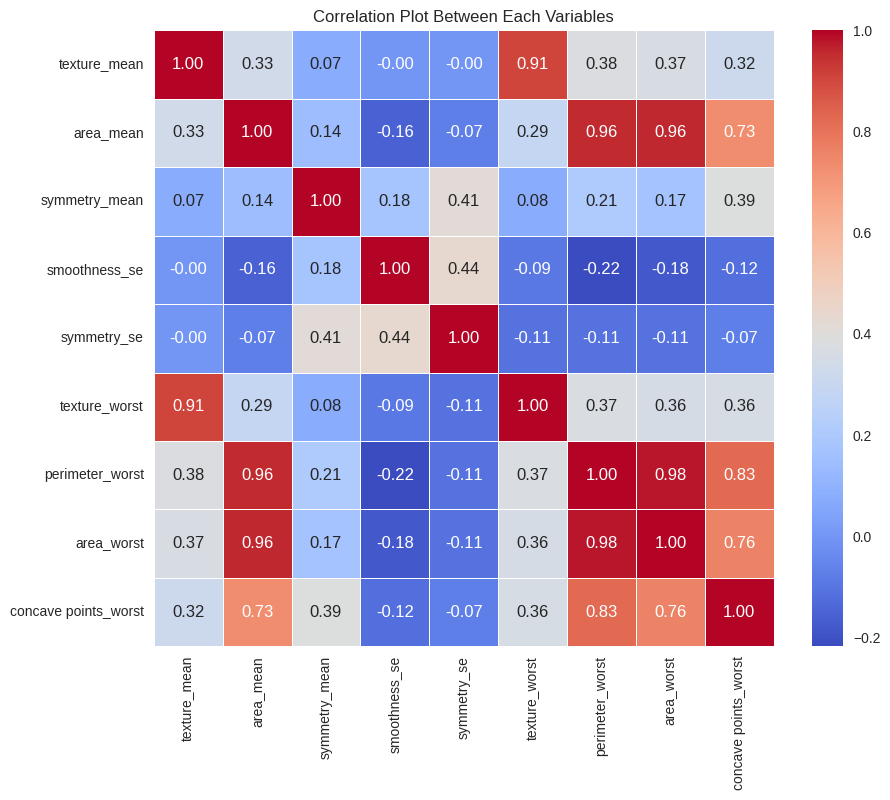

In [ ]:
# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap using seaborn
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Add a title to the plot
plt.title('Correlation Plot Between Each Variables')

# Show the plot
plt.show()

In [ ]:
train_set['diagnosis'].value_counts()

diagnosis
B    282
M    173
Name: count, dtype: int64

#Describe the histogram, pie chart of response varible

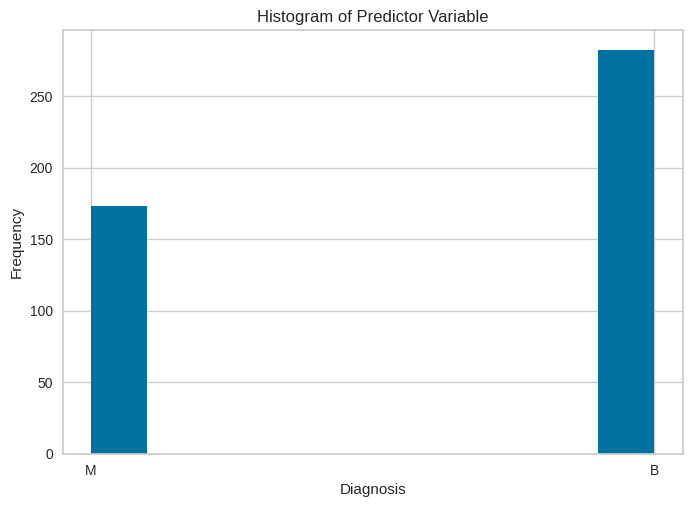

In [ ]:

# Create a histogram
plt.hist(Y_train)

# Add labels and title
plt.xlabel('Diagnosis')
plt.ylabel('Frequency')
plt.title('Histogram of Predictor Variable')

# Show the plot
plt.show()

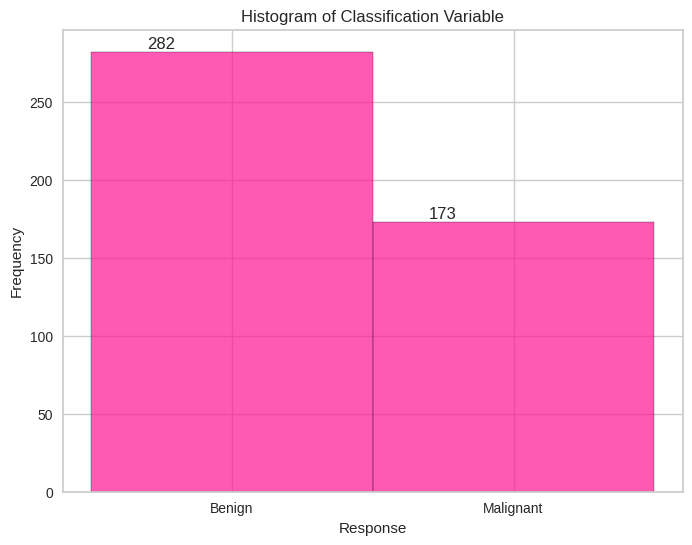

In [ ]:
# Map 'B' and 'M' to numerical values (e.g., 0 and 1)
Y_train_numerical = Y_train.map({'B': 0, 'M': 1})

# Set custom labels
labels = ['Benign', 'Malignant']

# Set up the matplotlib figure
plt.figure(figsize=(8, 6))

# Create a histogram of the binary response variable
counts, bins, _ = plt.hist(Y_train_numerical, bins=[-0.5, 0.5, 1.5], edgecolor='black', alpha=0.7, color='#FF1493')

# Customize the plot
plt.title('Histogram of Classification Variable')
plt.xlabel('Response')
plt.ylabel('Frequency')

# Set the x-axis ticks to represent the unique values in Y_train (0 and 1) with custom labels
plt.xticks([0, 1], labels)

# Display frequency values on top of each bar
for count, bin_edge in zip(counts, bins):
    plt.text(bin_edge + 0.25, count, str(int(count)), ha='center', va='bottom')

# Show the plot
plt.show()

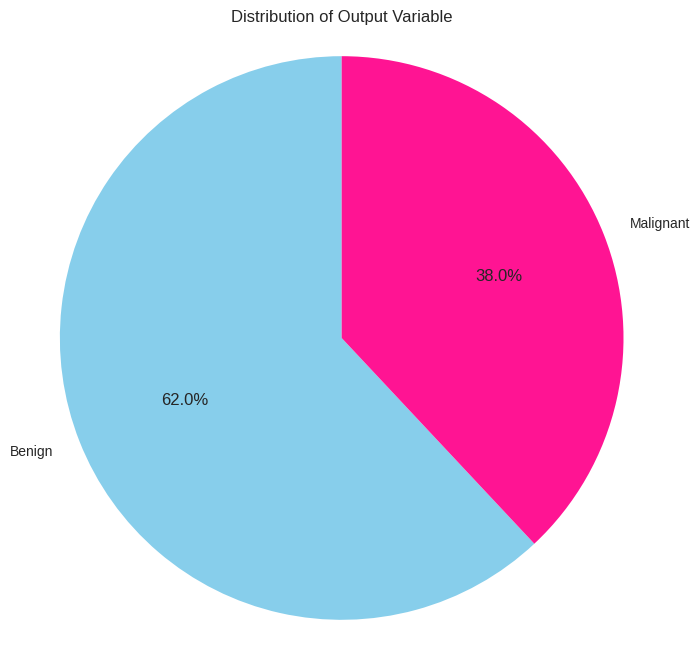

In [ ]:
# Assuming Y_train is your output variable containing 'Benign' and 'Malignant' labels
# Count the occurrences of each unique value in Y_train
counts = Y_train.value_counts()

# Set custom labels
labels = ['Benign', 'Malignant']

# Plotting
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=['skyblue', '#FF1493'])
plt.title('Distribution of Output Variable')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the plot
plt.show()

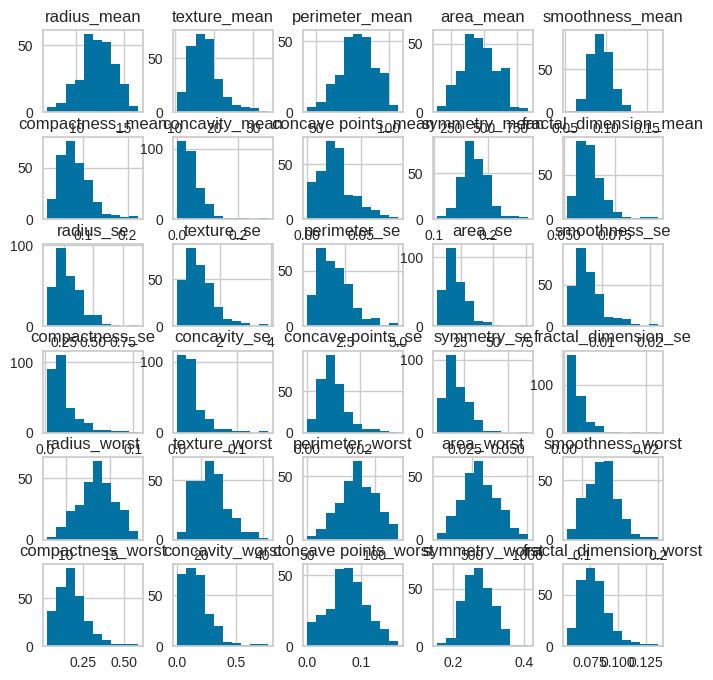

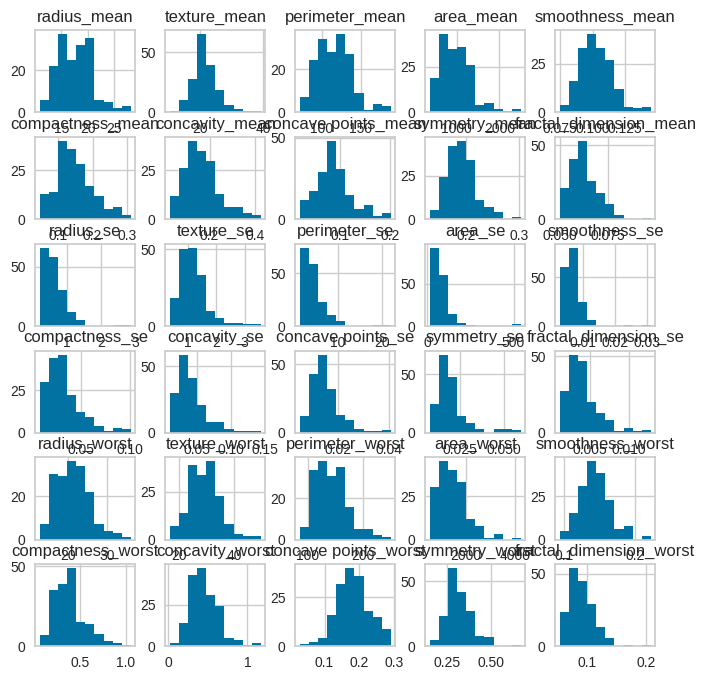

In [ ]:
train_set.groupby('diagnosis').hist(figsize=(8, 8))
pl.show()

#Univariate Analysis

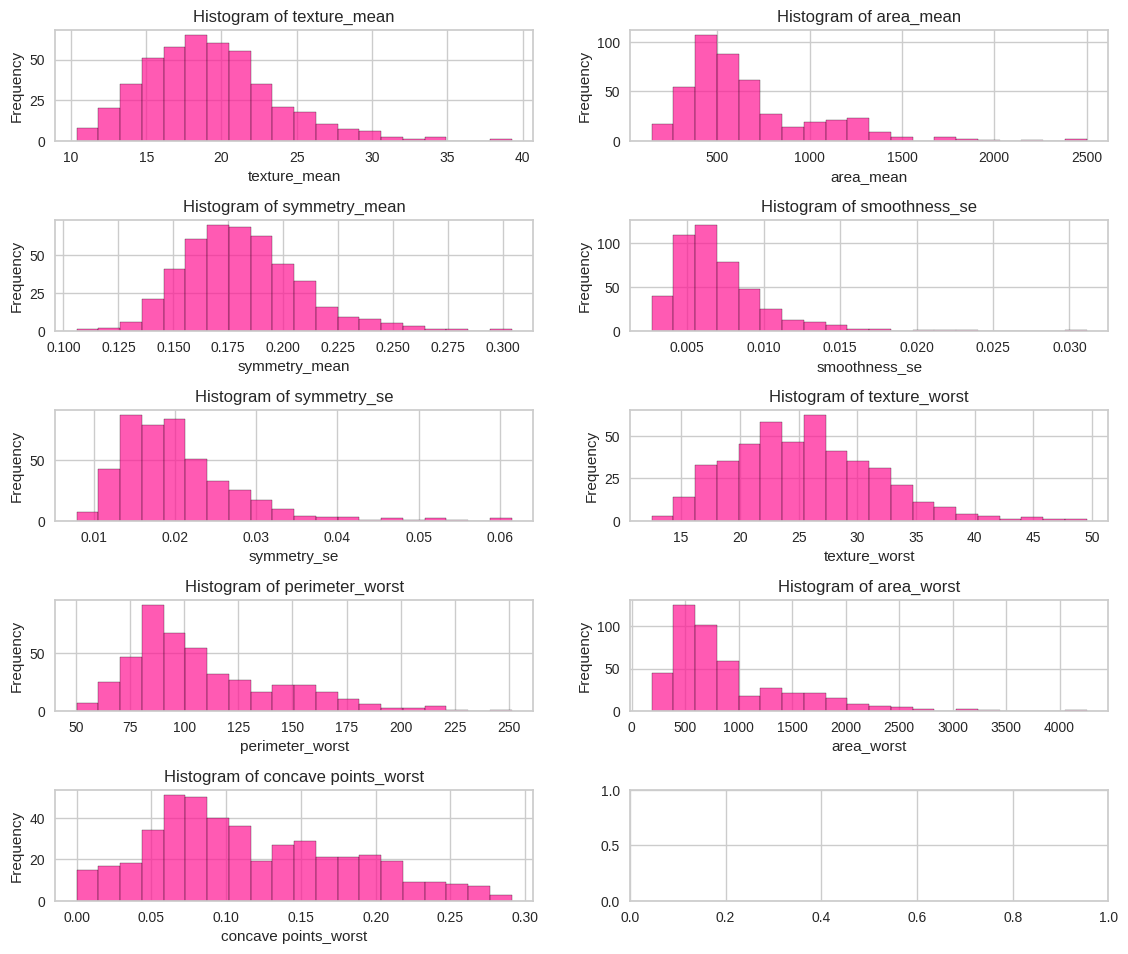

In [ ]:
# Selecting only numeric columns for the histogram
numeric_columns = X_train.select_dtypes(include='number').columns

# Determine the number of rows and columns for the subplot grid
num_plots = len(numeric_columns)
num_cols = 2 if num_plots > 1 else 1

# Set up the subplots
num_rows = num_plots // num_cols + (num_plots % num_cols > 0)
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 2 * num_rows))
fig.tight_layout(pad=3.0)

# Create histograms for each numeric variable
for i, column in enumerate(numeric_columns):
    ax = axes[i // num_cols, i % num_cols] if num_plots > 1 else axes
    ax.hist(X_train[column], bins=20, edgecolor='black', alpha=0.7, color='#FF1493')
    ax.set_title(f'Histogram of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

# Show the plot
plt.show()

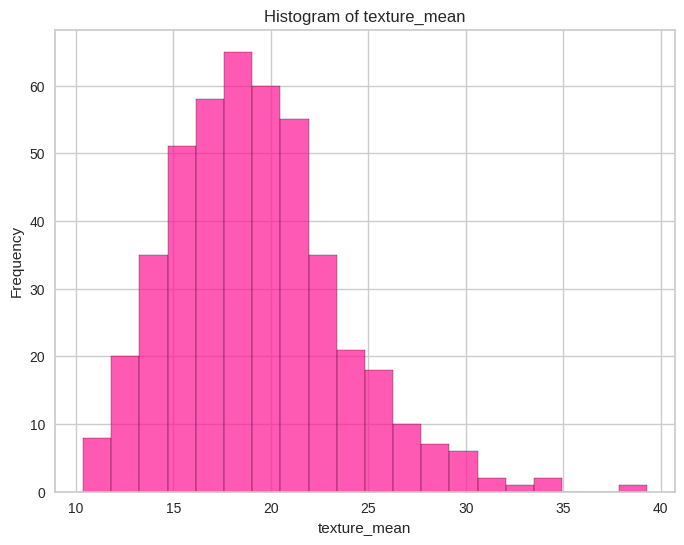

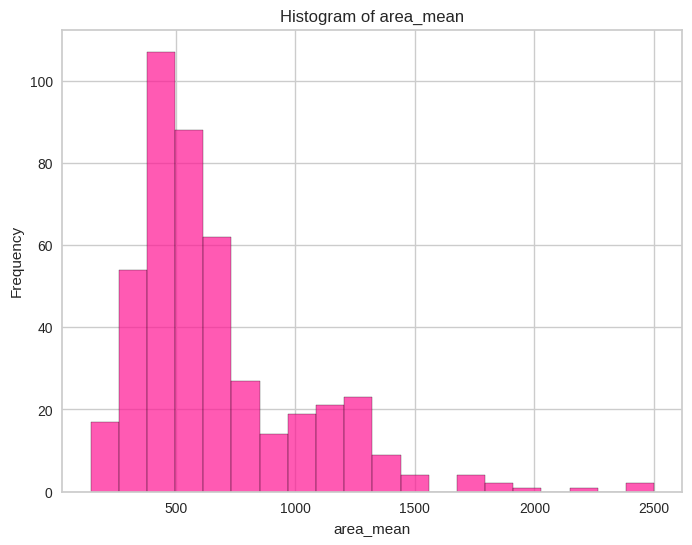

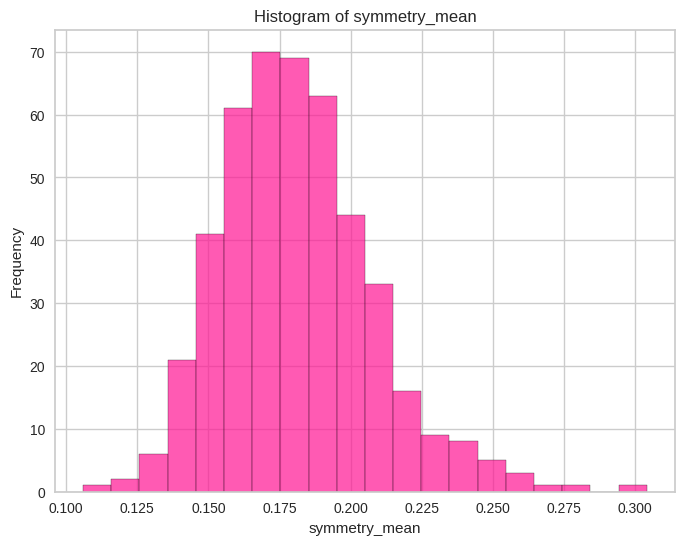

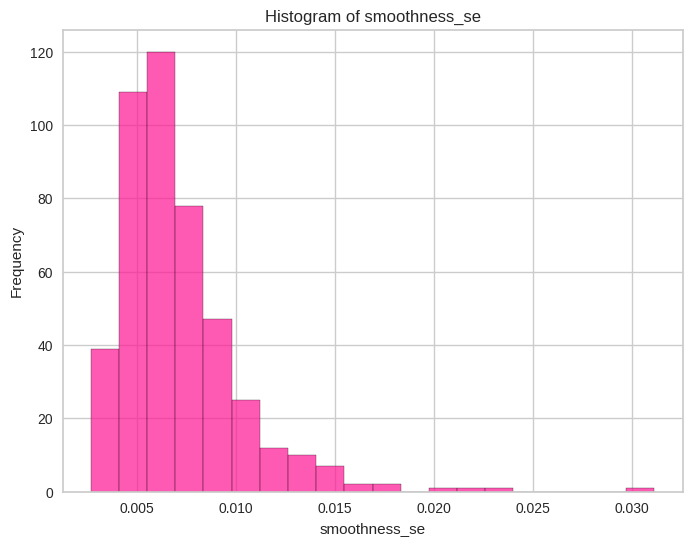

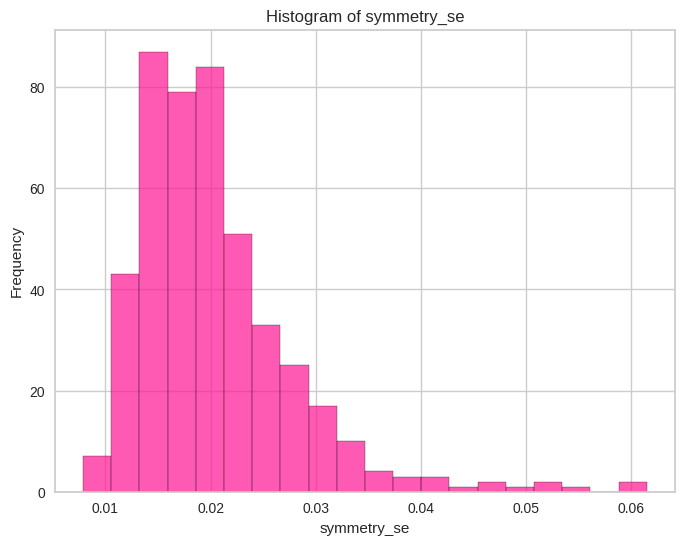

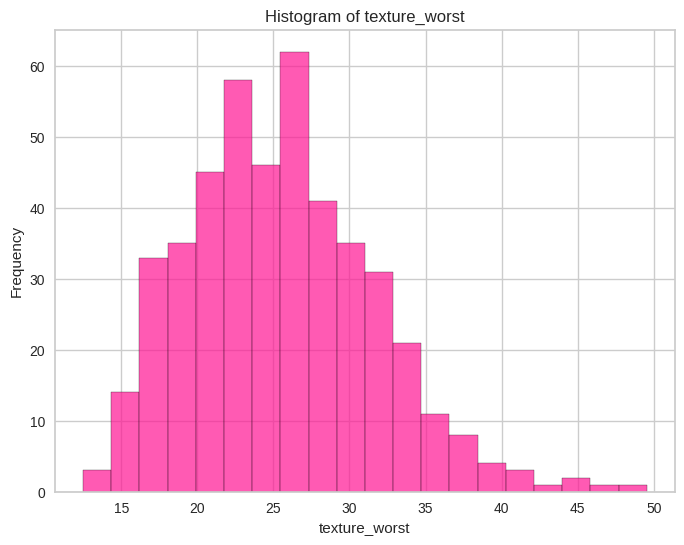

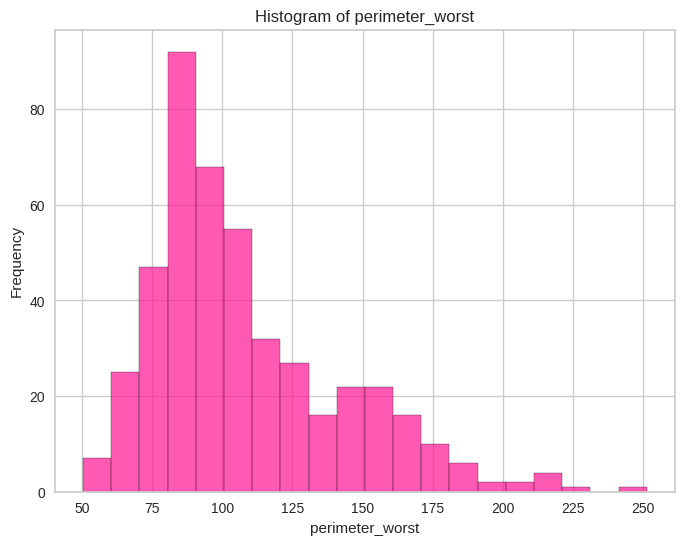

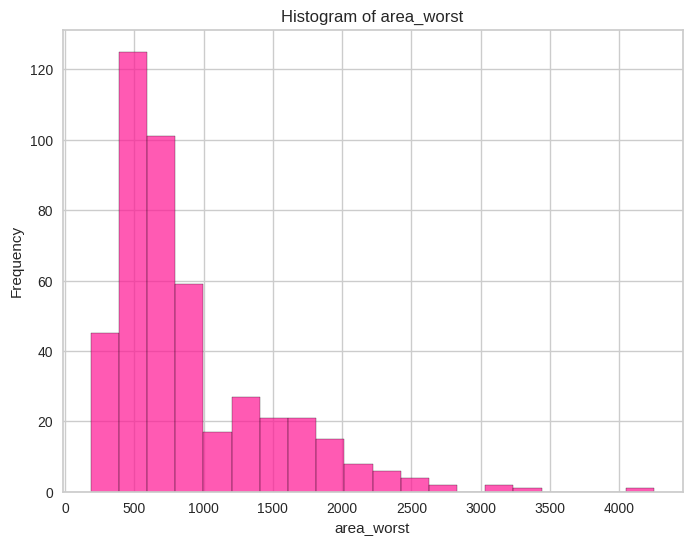

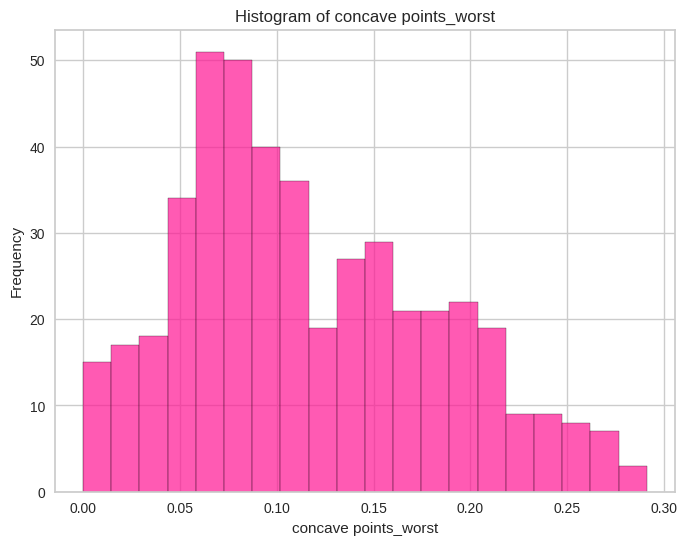

In [ ]:
# Selecting only numeric columns for the histogram
numeric_columns = X_train.select_dtypes(include='number').columns

# Set up the subplots
num_plots = len(numeric_columns)

# Create histograms for each numeric variable one at a time
for i, column in enumerate(numeric_columns):
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.hist(X_train[column], bins=20, edgecolor='black', alpha=0.7, color='#FF1493')
    ax.set_title(f'Histogram of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')
    plt.show()

#boxplot

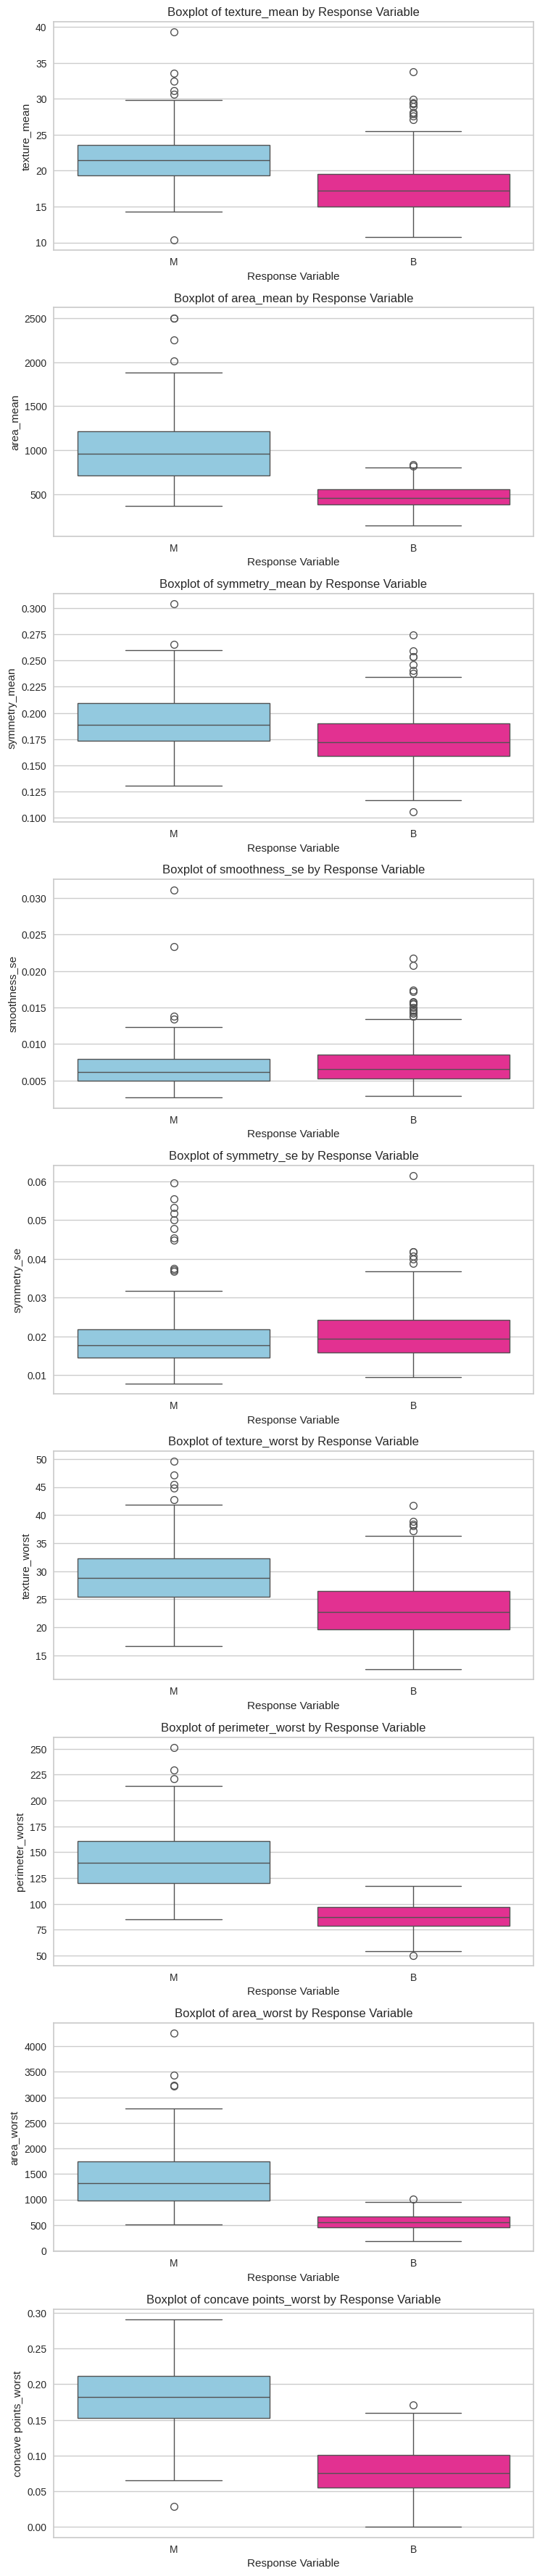

In [ ]:
# Selecting only numeric columns for the boxplot
numeric_columns = X_train.select_dtypes(include='number').columns

# Combine the features and the response variable into a single DataFrame
df_combined = pd.concat([X_train[numeric_columns], Y_train.rename('Target')], axis=1)

# Set up the matplotlib figure
fig, axes = plt.subplots(nrows=len(numeric_columns), figsize=(8, 4 * len(numeric_columns)))
fig.tight_layout(pad=3.0)

# Create boxplots for each numeric variable with different colors for response outcomes
for i, column in enumerate(numeric_columns, start=1):
    ax = axes[i - 1]
    sns.boxplot(x='Target', y=column, data=df_combined, hue='Target', ax=ax, palette=['skyblue', '#FF1493'])
    ax.set_title(f'Boxplot of {column} by Response Variable')
    ax.set_xlabel('Response Variable')
    ax.set_ylabel(column)

# Show the plot
plt.show()

Scatterplots

In [ ]:
# Scatter plot: area_mean vs radius_mean
plt.figure(figsize=(10, 6))
plt.scatter(X_train['radius_mean'], X_train['area_mean'], color='blue', alpha=0.5)
plt.title('Scatter Plot: radius_mean vs area_mean')
plt.xlabel('radius_mean')
plt.ylabel('area_mean')
plt.grid(True)
plt.show()

# Scatter plot: 'concave points_se'Vs 'symmetry_se'
plt.figure(figsize=(10, 6))
plt.scatter(X_train['concave points_se'], X_train['symmetry_se'], color='green', alpha=0.5)
plt.title('Scatter Plot: concave points_se vs symmetry_se')
plt.xlabel('concave points_se')
plt.ylabel('symmetry_se')
plt.grid(True)
plt.show()


# Scatter plot: radius_mean vs concavity_worst
plt.figure(figsize=(10, 6))
plt.scatter(X_train['radius_mean'], X_train['concavity_worst'], color='#FF1493', alpha=0.5)
plt.title('Scatter Plot: radius_mean vs concavity_worst')
plt.xlabel('radius_mean')
plt.ylabel('concavity_worst')
plt.grid(True)
plt.show()


# Scatter plot: radius_mean vs fractal_dimension_se
plt.figure(figsize=(10, 6))
plt.scatter(X_train['radius_mean'], X_train['fractal_dimension_se'], color='purple', alpha=0.5)
plt.title('Scatter Plot: radius_mean vs fractal_dimension_se')
plt.xlabel('radius_mean')
plt.ylabel('fractal_dimension_se')
plt.grid(True)
plt.show()



# Scatter plot: 'compactness_worst', 'concavity_worst'
plt.figure(figsize=(10, 6))
plt.scatter(X_train['compactness_worst'], X_train['concavity_worst'], color='brown', alpha=0.5)
plt.title('Scatter Plot: compactness_worst vs concavity_worst')
plt.xlabel('compactness_worst')
plt.ylabel('concavity_worst')
plt.grid(True)
plt.show()

KeyError: 'radius_mean'

<Figure size 1000x600 with 0 Axes>

#PCA

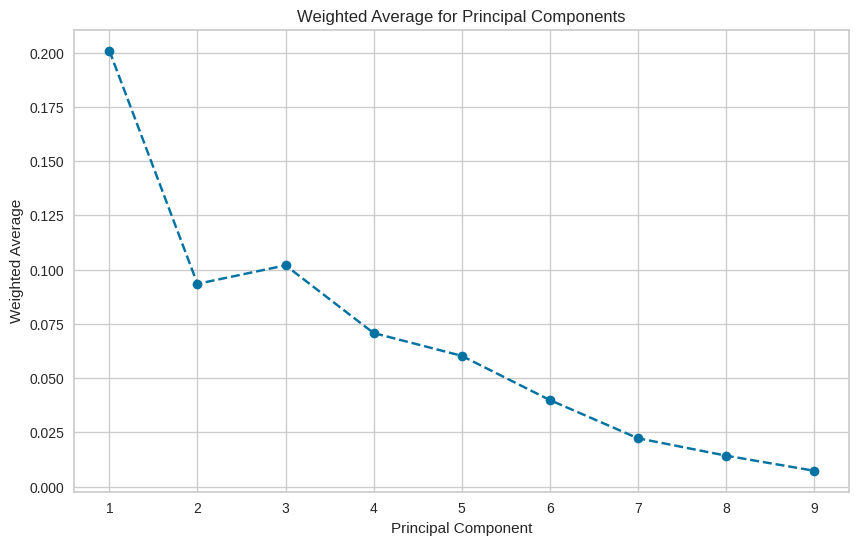

In [ ]:
# Selecting only numeric columns for PCA
numeric_columns = X_train.select_dtypes(include='number').columns
X_numeric = X_train[numeric_columns]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Get the loadings (eigenvectors)
loadings = pca.components_

# Calculate the weighted average for each principal component
weighted_average = np.abs(loadings) * np.sqrt(explained_variance_ratio.reshape(-1, 1))

# Plotting the weighted average
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(weighted_average) + 1), weighted_average.mean(axis=1), marker='o', linestyle='--')
plt.title('Weighted Average for Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Weighted Average')
plt.grid(True)
plt.show()

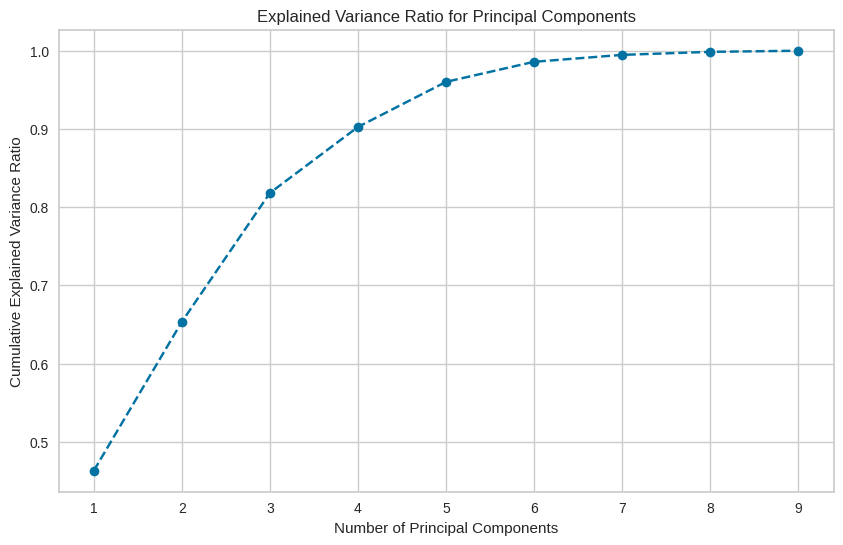

In [ ]:
# Selecting only numeric columns for PCA
numeric_columns = X_train.select_dtypes(include='number').columns
X_numeric = X_train[numeric_columns]




# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Plotting the explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio.cumsum(), marker='o', linestyle='--')
plt.title('Explained Variance Ratio for Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()

#PLSR

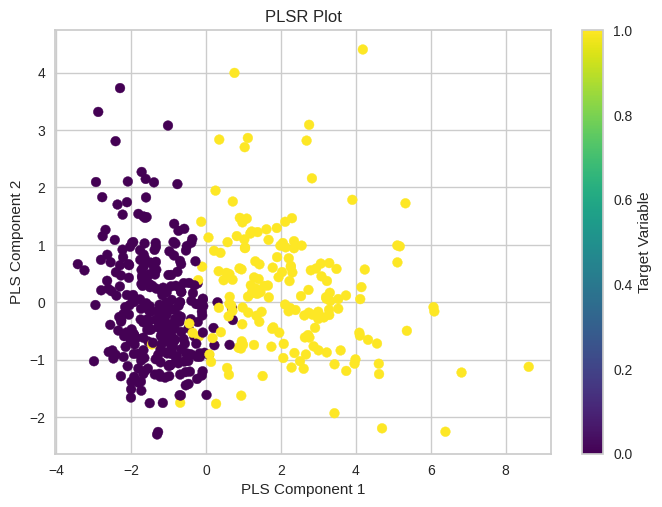

In [ ]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode the target variable
Y_train_encoded = label_encoder.fit_transform(Y_train)

# Instantiate PLSRegression model
pls = PLSRegression(n_components=2)

# Fit the model
pls.fit(X_train, Y_train_encoded)

# Get the transformed data
X_pls = pls.transform(X_train)

# Plot the PLSR scores
plt.scatter(X_pls[:, 0], X_pls[:, 1], c=Y_train_encoded, cmap='viridis')
plt.xlabel('PLS Component 1')
plt.ylabel('PLS Component 2')
plt.title('PLSR Plot')
plt.colorbar(label='Target Variable')
plt.grid(True)
plt.show()

In [ ]:
# Define custom colors
custom_colors = ['#FFC0CB', '#FF91A4', '#FF628E', '#FF3379', '#FF0063']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode the target variable
Y_train_encoded = label_encoder.fit_transform(Y_train)

# Instantiate PLSRegression model
pls = PLSRegression(n_components=2)

# Fit the model
pls.fit(X_train, Y_train_encoded)

# Get the transformed data
X_pls = pls.transform(X_train)

# Create a ListedColormap with custom colors
pink_cmap = ListedColormap(custom_colors)

# Plot the PLSR scores with custom colormap
plt.scatter(X_pls[:, 0], X_pls[:, 1], c=Y_train_encoded, cmap=pink_cmap)
plt.xlabel('PLS Component 1')
plt.ylabel('PLS Component 2')
plt.title('PLSR Plot with Custom Colormap')
plt.colorbar(label='Target Variable')
plt.grid(True)
plt.show()

NameError: name 'LabelEncoder' is not defined

In [ ]:
'''# Selecting only numeric columns for PLS
numeric_columns = X_train.select_dtypes(include='number').columns
X_numeric = X_train[numeric_columns]

# Standardize the data
scaler_X = StandardScaler()
scaler_Y = StandardScaler()

X_scaled = scaler_X.fit_transform(X_numeric)
Y_scaled = scaler_Y.fit_transform(Y_train.values.reshape(-1, 1))

# Apply PLS regression
pls = PLSRegression(n_components=2)  # You can adjust the number of components
pls.fit(X_scaled, Y_scaled)

# Transform the data
X_pls = pls.transform(X_scaled)

# Define a colormap with a range of pink shades
pink_cmap = ListedColormap(['#FFC0CB', '#FF91A4', '#FF628E', '#FF3379', '#FF0063'])

# Scatter plot of the first two PLS components with pink colors
plt.figure(figsize=(10, 6))
plt.scatter(X_pls[:, 0], X_pls[:, 1], c=Y_train, cmap=pink_cmap, edgecolors='k', vmin=Y_train.min(), vmax=Y_train.max())
plt.title('PLS Score Plot')
plt.xlabel('PLS Component 1')
plt.ylabel('PLS Component 2')
plt.colorbar(label='Response Variable', ticks=[Y_train.min(), Y_train.max()])
plt.grid(True)
plt.show()'''

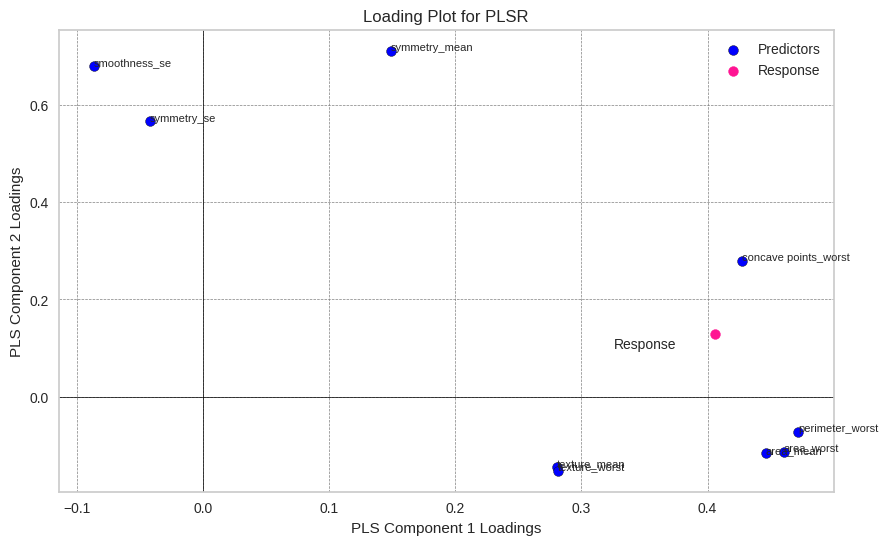

In [ ]:

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode the target variable
Y_train_encoded = label_encoder.fit_transform(Y_train)

# Standardize the data
scaler_X = StandardScaler()
scaler_Y = StandardScaler()
X_scaled = scaler_X.fit_transform(X_numeric)
Y_scaled = scaler_Y.fit_transform(Y_train_encoded.reshape(-1, 1))
# Apply PLS regression
pls = PLSRegression(n_components=2)  # You can adjust the number of components
pls.fit(X_scaled, Y_scaled)

# Get the loadings
loadings = pls.x_loadings_

# Plotting the loading plot with component 1 loading as x-axis and component 2 loading as y-axis
plt.figure(figsize=(10, 6))

# Scatter plot for predictor variables
plt.scatter(loadings[:, 0], loadings[:, 1], c='blue', marker='o', edgecolors='k', s=50, label='Predictors')

# Annotating each point with variable names for predictors
for i, txt in enumerate(numeric_columns):
    plt.annotate(txt, (loadings[i, 0], loadings[i, 1]), fontsize=8)

# Scatter plot for response variable
response_loading_x = pls.y_loadings_[0, 0]
response_loading_y = pls.y_loadings_[0, 1]
plt.scatter(response_loading_x, response_loading_y, c='#FF1493', marker='o', s=50, label='Response')

# Annotating the response variable point
plt.annotate('Response', (response_loading_x, response_loading_y), textcoords="offset points", xytext=(-50, -10), ha='center', fontsize=10)

plt.title('Loading Plot for PLSR')
plt.xlabel('PLS Component 1 Loadings')
plt.ylabel('PLS Component 2 Loadings')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.legend()
plt.show()

# See clusters

#K-means clusters method to observe clusters

Elbow method

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

NameError: name 'KMeans' is not defined

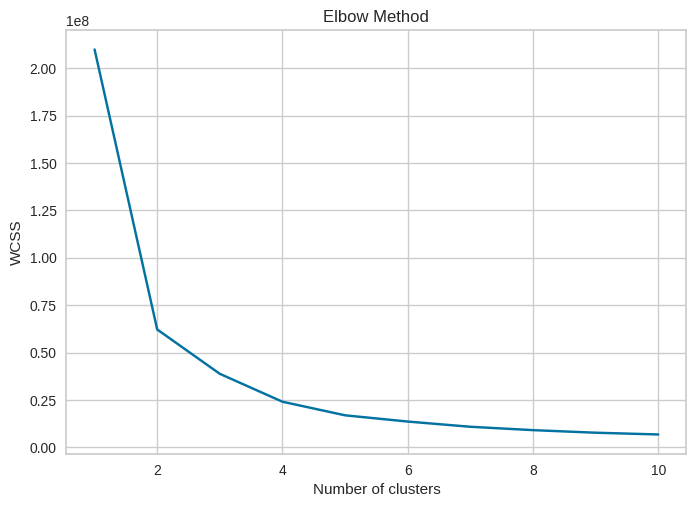

In [ ]:
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

Average Shilhoutte method

In [ ]:
random.seed(10)
pcadf = pd.DataFrame(data = X_train)

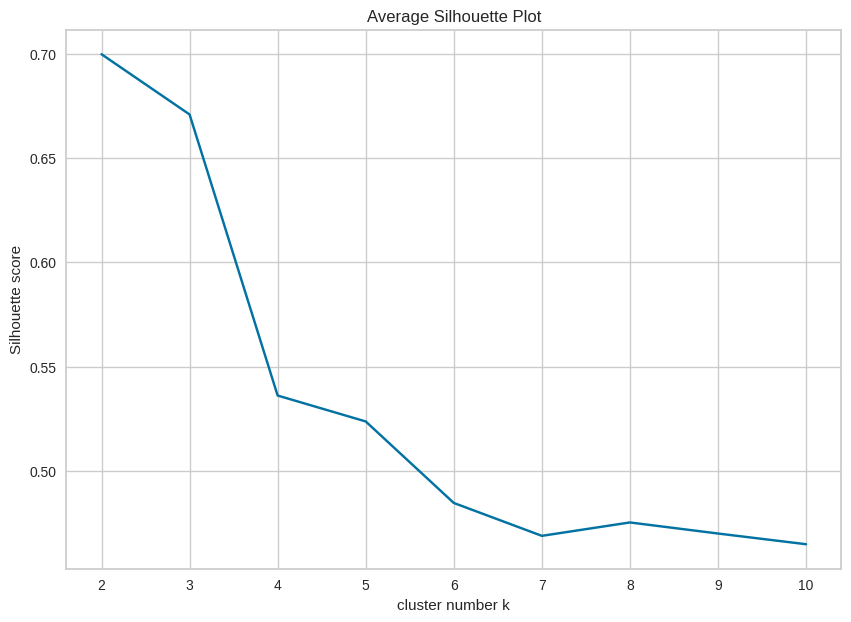

In [ ]:
K = [2, 3, 4, 5, 6, 7, 8, 9, 10]
silhouette_avg = []
for num_clusters in K:

 # initialise kmeans
 km = KMeans(n_clusters=num_clusters, n_init=25)
 km.fit(pcadf)
 cluster_labels = km.labels_

 # silhouette score
 silhouette_avg.append(silhouette_score(pcadf, cluster_labels))

plt.figure(figsize=(10,7))
plt.plot(K,silhouette_avg,'bx-')
plt.xlabel('cluster number k')
plt.ylabel('Silhouette score')
plt.title('Average Silhouette Plot')
plt.show()

In [ ]:
random.seed(10)
kmeans = KMeans(n_clusters =2)

NameError: name 'random' is not defined

In [ ]:
X_train_df = pd.DataFrame(X_train)


In [ ]:
clus_fit=kmeans.fit(X_train_df)
clus_fit

NameError: name 'kmeans' is not defined

In [ ]:
clusters = kmeans.labels_

NameError: name 'kmeans' is not defined

In [ ]:
silhouette_vals = silhouette_samples(X_train_df, clusters)

# Get the average silhouette score
average_silhouette_score = silhouette_score(X_train_df, clusters)
print("Average silhouette score:", average_silhouette_score)

NameError: name 'silhouette_samples' is not defined

In [ ]:
# clustering
kmeans2 = KMeans(n_clusters=2, random_state=10, n_init=25, algorithm='lloyd')
kmeans2.fit(X_train_df)

# output
zero = []
one = []
for i in kmeans2.labels_:
    if i == 0:
        zero.append(i)
    else:
        one.append(i)


print('\n',
      "Cluster centers:", '\n',
      "Cluster 0 :", kmeans2.cluster_centers_[0],'\n',
       "Cluster 1 :", kmeans2.cluster_centers_[1], '\n','\n',
        "Clustering vector:" ,'\n', kmeans2.labels_, '\n','\n',
         "Total Within Cluster Sum of Squares : ", '\n',
         kmeans2.inertia_ , '\n',
          "Observation numbers :", '\n',
          "Cluster 0 :", len(zero), '\n',
          "Cluster 1 :", len(one))


 Cluster centers: 
 Cluster 0 : [2.17719444e+01 1.19993889e+03 1.90848148e-01 6.62791667e-03
 2.01201852e-02 2.88341667e+01 1.59475926e+02 1.76526852e+03
 1.94886111e-01] 
 Cluster 1 : [1.84282709e+01 4.99977522e+02 1.78387320e-01 7.22414121e-03
 2.04316657e-02 2.45561383e+01 9.25465130e+01 6.25592795e+02
 9.26103775e-02] 
 
 Clustering vector: 
 [0 1 1 0 1 1 1 0 1 0 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 0 1 1 1 1 0
 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1
 0 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 0 1 1 0 0 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 0 1 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 0 0 1 0 1 0 1 1 0 1 0 1
 1 0 1 1 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 0 0 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 0 1 1

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


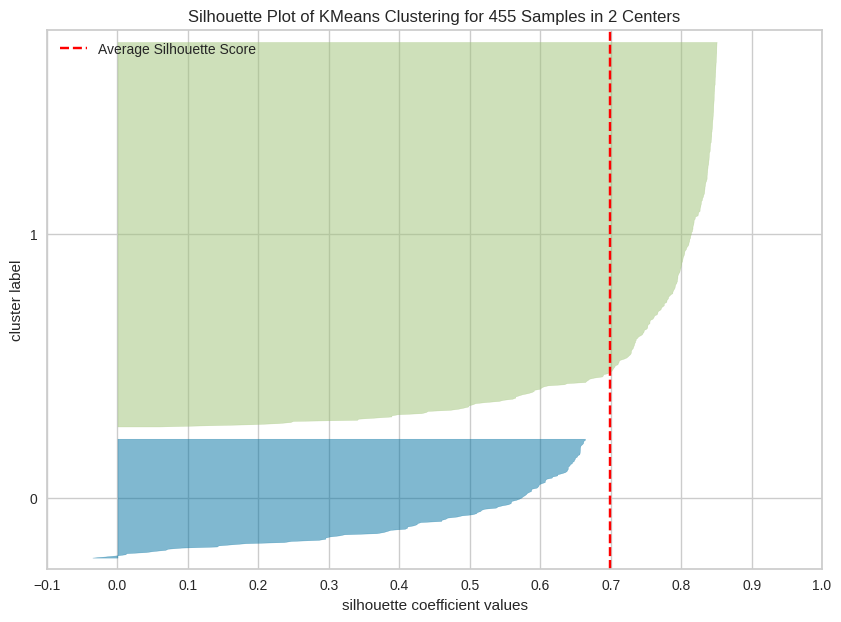

SilhouetteVisualizer(ax=<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 455 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>,
                     colors='yellowbrick',
                     estimator=KMeans(n_clusters=2, n_init=25, random_state=10))

In [ ]:
plt.figure(figsize=(10,7))
silhouette_visualizer(kmeans2, pcadf, colors='yellowbrick')

#Clustering

In [ ]:
df = pd.DataFrame(train_set)

In [ ]:
cluster_0_df = df[kmeans2.labels_ == 0]
cluster_1_df = df[kmeans2.labels_ == 1]

In [ ]:
cluster_0_df

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
567,20.60,29.33,140.1,1265.0,0.11780,0.27700,0.3514,0.15200,0.2397,0.07016,...,39.42,184.6,1821.0,0.1650,0.8681,0.9387,0.2650,0.4087,0.12400,M
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
118,15.78,22.91,105.7,782.6,0.11550,0.17520,0.2133,0.09479,0.2096,0.07331,...,30.50,130.3,1272.0,0.1855,0.4925,0.7356,0.2034,0.3274,0.12520,M
181,21.09,26.57,142.7,1311.0,0.11410,0.28320,0.2487,0.14960,0.2395,0.07398,...,33.48,176.5,2089.0,0.1491,0.7584,0.6780,0.2903,0.4098,0.12840,M
72,17.20,24.52,114.2,929.4,0.10710,0.18300,0.1692,0.07944,0.1927,0.06487,...,33.82,151.6,1681.0,0.1585,0.7394,0.6566,0.1899,0.3313,0.13390,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,17.46,39.28,113.4,920.6,0.09812,0.12980,0.1417,0.08811,0.1809,0.05966,...,44.87,141.2,1408.0,0.1365,0.3735,0.3241,0.2066,0.2853,0.08496,M
256,19.55,28.77,133.6,1207.0,0.09260,0.20630,0.1784,0.11440,0.1893,0.06232,...,36.27,178.6,1926.0,0.1281,0.5329,0.4251,0.1941,0.2818,0.10050,M
156,17.68,20.74,117.4,963.7,0.11150,0.16650,0.1855,0.10540,0.1971,0.06166,...,25.11,132.9,1302.0,0.1418,0.3498,0.3583,0.1515,0.2463,0.07738,M
369,22.01,21.90,147.2,1482.0,0.10630,0.19540,0.2448,0.15010,0.1824,0.06140,...,25.80,195.0,2227.0,0.1294,0.3885,0.4756,0.2432,0.2741,0.08574,M


In [ ]:
cluster_0_df['diagnosis'].value_counts()

diagnosis
M    108
Name: count, dtype: int64

In [ ]:
cluster_1_df

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
295,13.77,13.27,88.06,582.7,0.09198,0.06221,0.01063,0.01917,0.1592,0.05912,...,16.93,94.17,661.1,0.1170,0.1072,0.03732,0.05802,0.2823,0.06794,B
91,15.37,22.76,100.20,728.2,0.09200,0.10360,0.11220,0.07483,0.1717,0.06097,...,25.84,107.50,830.9,0.1257,0.1997,0.28460,0.14760,0.2556,0.06828,M
94,15.06,19.83,100.30,705.6,0.10390,0.15530,0.17000,0.08815,0.1855,0.06284,...,24.23,123.50,1025.0,0.1551,0.4203,0.52030,0.21150,0.2834,0.08234,M
403,12.94,16.17,83.18,507.6,0.09879,0.08836,0.03296,0.02390,0.1735,0.06200,...,23.02,89.69,580.9,0.1172,0.1958,0.18100,0.08388,0.3297,0.07834,B
508,16.30,15.70,104.70,819.8,0.09427,0.06712,0.05526,0.04563,0.1711,0.05657,...,17.76,109.80,928.2,0.1354,0.1361,0.19470,0.13570,0.2300,0.07230,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,12.65,18.17,82.69,485.6,0.10760,0.13340,0.08017,0.05074,0.1641,0.06854,...,22.15,95.29,633.7,0.1533,0.3842,0.35820,0.14070,0.3230,0.10330,B
123,14.50,10.89,94.28,640.7,0.11010,0.10990,0.08842,0.05778,0.1856,0.06402,...,15.98,102.80,745.5,0.1313,0.1788,0.25600,0.12210,0.2889,0.08006,B
320,10.25,16.18,66.52,324.2,0.10610,0.11110,0.06726,0.03965,0.1743,0.07279,...,20.61,71.53,390.4,0.1402,0.2360,0.18980,0.09744,0.2608,0.09702,B
527,12.34,12.27,78.94,468.5,0.09003,0.06307,0.02958,0.02647,0.1689,0.05808,...,19.27,87.22,564.9,0.1292,0.2074,0.17910,0.10700,0.3110,0.07592,B


In [ ]:
cluster_1_df['diagnosis'].value_counts()

diagnosis
B    282
M     65
Name: count, dtype: int64

In [ ]:
model_cluster_0 = LogisticRegression()
model_cluster_0.fit(cluster_0_df.drop(columns=['diagnosis']), cluster_0_df['diagnosis'])

model_cluster_1 = LogisticRegression()
model_cluster_1.fit(cluster_1_df.drop(columns=['diagnosis']), cluster_1_df['diagnosis'])

ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 'M'

#Scale the data

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Logistic Regression model

train score: 0.9648351648351648
test score:  0.956140350877193


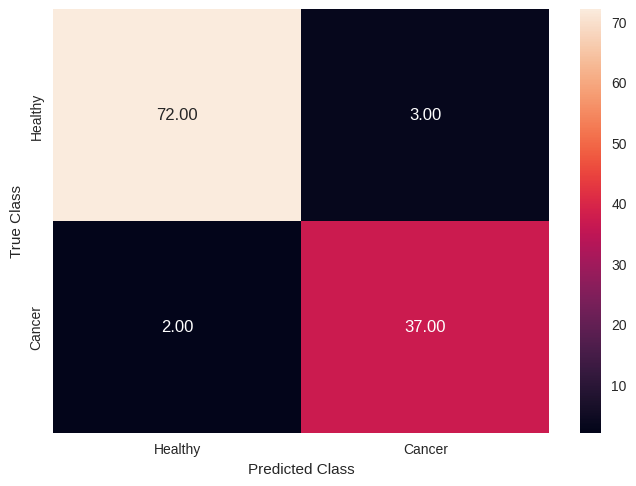

In [ ]:
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train,Y_train)
Y_pred1 = logistic_model.predict(X_test)

print('train score: ' + str(logistic_model.score(X_train,Y_train)))
print('test score:  ' + str(logistic_model.score(X_test, Y_test)))

cm = confusion_matrix(Y_test, Y_pred1)
sns.heatmap(cm, annot=True, fmt='.2f',
            xticklabels=['Healthy', 'Cancer'], yticklabels=['Healthy', 'Cancer'])
pl.ylabel('True Class')
pl.xlabel('Predicted Class')
pl.show()

In [ ]:
print(classification_report(Y_test,Y_pred1))

              precision    recall  f1-score   support

           B       0.97      0.96      0.97        75
           M       0.93      0.95      0.94        39

    accuracy                           0.96       114
   macro avg       0.95      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



#Hyperpruning Gride search

In [ ]:
def grid_search(model,params,X_train,y_train):
    grid = GridSearchCV(model,params,scoring='f1')
    grid.fit(X_train,y_train)
    return grid.best_params_

#KNN Model

train score: 0.9692307692307692
test score:  0.956140350877193


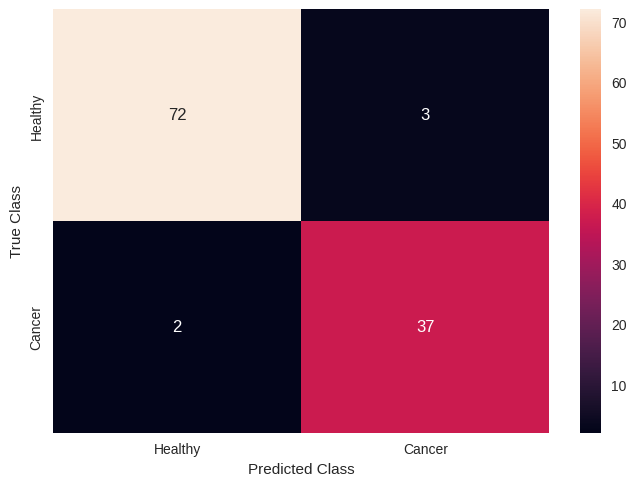

In [ ]:
# Create a KNN classifier
knn_model = KNeighborsClassifier()

# Train the model
knn_model.fit(X_train, Y_train)

# Predict on the test set
Y_pred_knn = knn_model.predict(X_test)

# Calculate and print accuracy score
accuracy_knn = accuracy_score(Y_test, Y_pred_knn)
print('train score: ' + str(knn_model.score(X_train, Y_train)))
print('test score:  ' + str(accuracy_knn))

# Plot confusion matrix
cm_knn = confusion_matrix(Y_test, Y_pred_knn)
sns.heatmap(cm_knn, annot=True, fmt='d',
            xticklabels=['Healthy', 'Cancer'], yticklabels=['Healthy', 'Cancer'])
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

In [ ]:
print(classification_report(Y_test,Y_pred_knn))

              precision    recall  f1-score   support

           B       0.97      0.96      0.97        75
           M       0.93      0.95      0.94        39

    accuracy                           0.96       114
   macro avg       0.95      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



#Random Forest model

train score: 1.0
test score:  0.9824561403508771


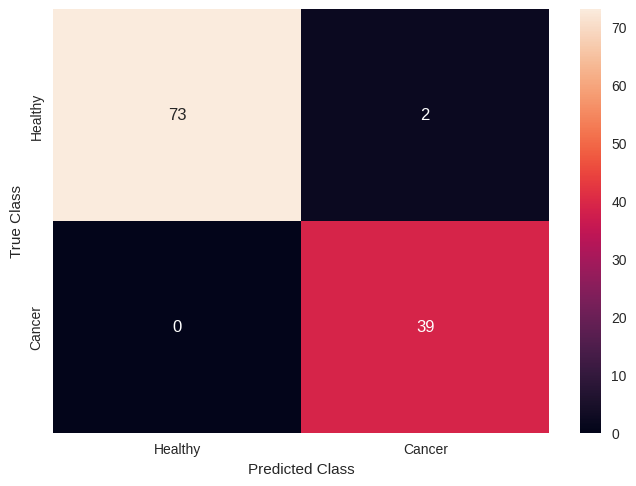

In [ ]:
# Create a Random Forest classifier
random_forest_model = RandomForestClassifier(random_state=42)

# Train the model
random_forest_model.fit(X_train, Y_train)

# Predict on the test set
Y_pred2 = random_forest_model.predict(X_test)

# Calculate and print accuracy score
accuracy = accuracy_score(Y_test, Y_pred2)
print('train score: ' + str(random_forest_model.score(X_train,Y_train)))
print('test score:  ' + str(random_forest_model.score(X_test, Y_test)))

# Plot confusion matrix
cm = confusion_matrix(Y_test, Y_pred2)
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=['Healthy', 'Cancer'], yticklabels=['Healthy', 'Cancer'])
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

In [ ]:
print(classification_report(Y_test,Y_pred2))

              precision    recall  f1-score   support

           B       1.00      0.97      0.99        75
           M       0.95      1.00      0.97        39

    accuracy                           0.98       114
   macro avg       0.98      0.99      0.98       114
weighted avg       0.98      0.98      0.98       114



variable Importancy

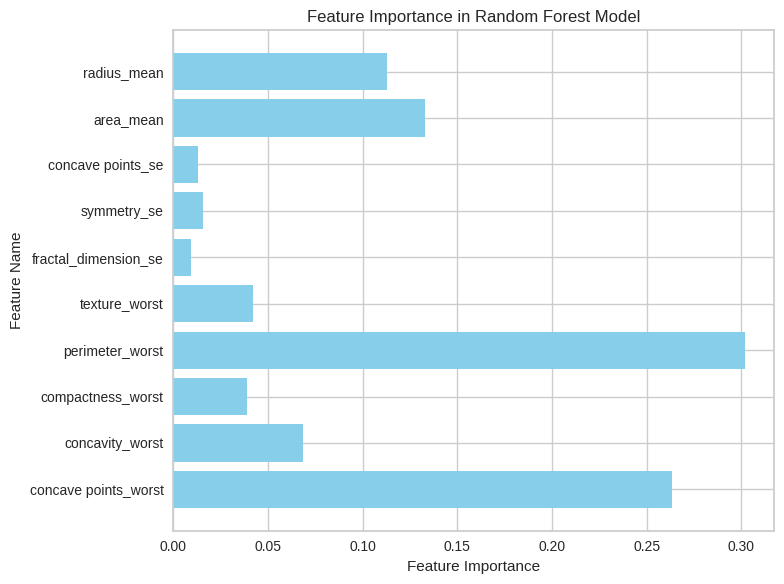

In [ ]:
# Get the feature importances
importances2 = random_forest_model.feature_importances_

# Get feature names from the DataFrame
feature_names = Col

# Create a bar chart of feature importances
plt.figure(figsize=(8, 6))
plt.barh(feature_names, importances2, color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Feature Name")
plt.title("Feature Importance in Random Forest Model")
plt.gca().invert_yaxis()  # Invert y-axis to display most important on top
plt.tight_layout()
plt.show()

#XG Boost

train score: 1.0
test score:  0.9736842105263158


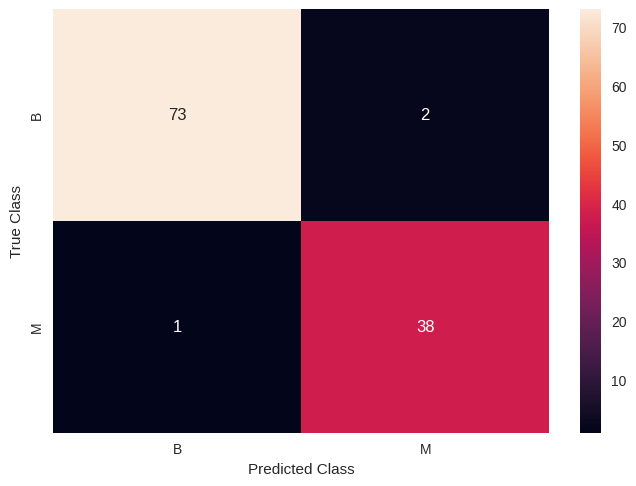

In [ ]:
# Convert target variable to numerical format using label encoding
label_encoder = LabelEncoder()
Y_train_encoded = label_encoder.fit_transform(Y_train)
Y_test_encoded = label_encoder.transform(Y_test)

# Create an XGBoost classifier
xgb_model = xgb.XGBClassifier()

# Train the model
xgb_model.fit(X_train, Y_train_encoded)

# Predict on the test set
Y_pred_xgb = xgb_model.predict(X_test)

# Calculate and print accuracy score
accuracy_xgb = accuracy_score(Y_test_encoded, Y_pred_xgb)
print('train score: ' + str(xgb_model.score(X_train, Y_train_encoded)))
print('test score:  ' + str(accuracy_xgb))

# Plot confusion matrix
cm_xgb = confusion_matrix(Y_test_encoded, Y_pred_xgb)
sns.heatmap(cm_xgb, annot=True, fmt='d',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

In [ ]:
Y_pred_decoded = label_encoder.inverse_transform(Y_pred_xgb)
print(classification_report(Y_test,Y_pred_decoded))

NameError: name 'label_encoder' is not defined

#Save the model

In [ ]:
filename = 'model.sav'

In [ ]:
import pickle

In [ ]:
pickle.dump(random_forest_model,open(filename,'wb'))

In [ ]:
import joblib

# Save the trained model to a .sav file
joblib.dump(random_forest_model, '/content/drive/MyDrive/SavedModels/random_forest_model.sav')


['/content/drive/MyDrive/SavedModels/random_forest_model.sav']

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
